### В данном уроке мы выделим еще несколько потенциально важных фичей из изначального датасета и попробуем применить изученные методы отбора признаков к итоговому датасету.

In [1]:
import numpy as np
import pandas as pd

processed_data = pd.read_csv('processed_data.csv', index_col='id')

processed_data.shape

(1458644, 5)

In [5]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime
id,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55


In [9]:
initial_data.shape

(1458644, 10)

In [2]:
initial_data = pd.read_csv('taxi_dataset.csv')

initial_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N


In [4]:
initial_data.shape[0] == processed_data.shape[0]

True

In [3]:
### Вернем в датасет колонку pickup_datetime

initial_data = initial_data.set_index('id')

processed_data = pd.merge(processed_data, initial_data['pickup_datetime'],
                          left_index=True, right_index=True)

In [6]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime
id,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55


Напомним, **pickup_datetime** - время начала поездки.

Кажется, что в зависимости от месяца/дня недели/времени суток движение на дорогах может отличаться. Как из-за погодных условий, так и из-за загруженности транспорта. Поэтому, есть подозрение, что будет полезно выделить ряд признаков из колонки **pickup_datetime**. Давайте исследуем зависимость нашей таргетной переменной от указанных факторов.

In [6]:
processed_data['pickup_datetime'] = pd.to_datetime(processed_data['pickup_datetime'])

processed_data['date'] = processed_data.pickup_datetime.dt.date
processed_data['day_of_week'] = processed_data.pickup_datetime.dt.dayofweek
processed_data['hour'] = processed_data.pickup_datetime.dt.hour
processed_data['month'] = processed_data.pickup_datetime.dt.month

In [7]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime,date,day_of_week,hour,month
id,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55,2016-03-14,0,17,3
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35,2016-06-12,6,0,6
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24,2016-01-19,1,11,1
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31,2016-04-06,2,19,4
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55,2016-03-26,5,13,3


In [25]:
processed_data['date'].shape

(1458644,)

In [ ]:
processed_data.groupby('date', as_index=False)['log_trip_duration'].mean()['log_trip_duration']

0    6.426564
1    6.491582
2    6.513662
3    6.528534
4    6.499936
5    6.419028
6    6.377635
Name: log_trip_duration, dtype: float64

Исследуем, когда и сколько поездок было совершено. 

Начнем с графиков, показывающих количество поездок в зависимости от времени суток/даты и т.д.

Так же полезно сразу показать и среднее значение таргетной переменной.

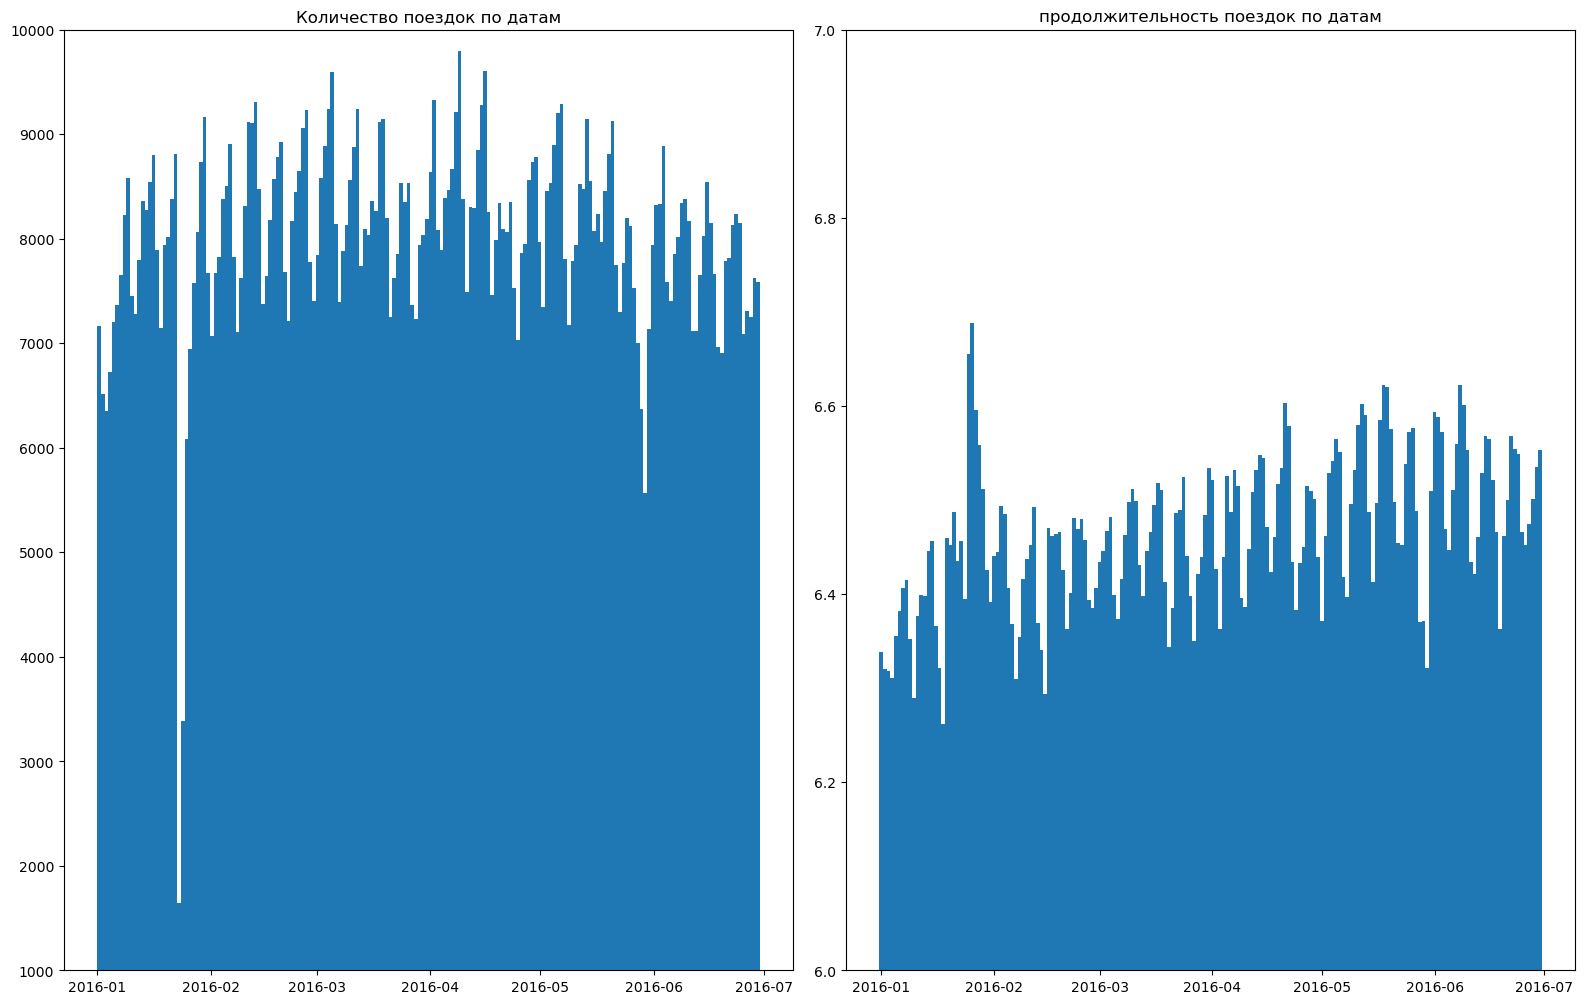

In [19]:

import matplotlib.pyplot as plt

fig = plt.figure() # создаем полотно 

fig.set_size_inches(16, 10) # установка размера полотна 

ax_1 = fig.add_subplot(1, 2, 1) # делим полотно на 1 строку 2 колонки (последнняя единица показываем в какой будем рисовать) рисуем для первого графика 
plt.hist(processed_data['date'], bins=processed_data.date.unique().shape[0]) # hist рисуем гистограмму. отражаем из таблицы processed_data колонку data,
#в bins передается уникальые значения даты (unique). shape[0] количество уникальных строк(дат)
plt.ylim((1000, 10000)) # устанавливает пределны оси y 

ax_2 = fig.add_subplot(1, 2, 2) # делим полотно на 1 строку 2 колонки (последнняя единица показываем в какой будем рисовать) рисуем для вторго графика 
plt.bar(sorted(list(processed_data['date'].unique())), # берем уникальные даты, превращаем их в список и сортируем
        processed_data.groupby('date', as_index=False)['log_trip_duration'].mean()['log_trip_duration'], #групируем значения по дате, считаем ср.арифм.log_trip_duration
#as_index: Определяет, оставить ли ключи группировки в качестве индексов DataFrame. № .mean()['log_trip_duration'] это цепочка методов, которая сначала вычисляет среднее значение для каждой группы данных, а затем возвращает объект типа Series, содержащий только столбец 'log_trip_duration'.
        width=1) # width - ширина бар 
plt.ylim(6,7)# устанавливает пределны оси y  

fig.tight_layout() #автоматически настраивает размеры и положение рисунков на холсте, чтобы избежать перекрытия осей, заголовков, меток и других элементов графика.

ax_1.set(title = 'Количество поездок по датам') # названаие 1 гистрограммы 
ax_2.set(title = 'продолжительность поездок по датам') # названаие 2 гистрограммы 

plt.show() # показать график

Кажется, что внутри недели есть некоторая зависимость таргета от дня недели. 

Такая же зависимость может оказаться и внутри дня (в завимости от часов).

Предлагаю исследовать эту зависимость подробнее.

Изобразите следующие графики зависимостей:

- Количество поездок/Средняя продолжительность поездки vs День недели
- Количество поездок/Средняя продолжительность поездки vs время суток
- Средняя продолжительность поездки vs время суток для каждого дня недели (например, нарисовав с разными цветами и, соответственно, легендами)
- Аналогичные графики, используя информацию о месяце, внутри которого была совершена поездка.
- Ящики с усами для различных: времени суток, дня недели, месяца

Используйте любые доступные инструменты pyplot!

Далее, на основе полученных результатов, мы будем принимать решение о создании новых признаков.

EDA можно использовать не только для того, чтобы понять, какие фичи можно убрать из датасета. Но и для выделения базовых признаков. Этим и займемся!

P.S. Сами графики мы проверять у Вас не будем. Зато для ответа на устные вопросы понадобятся, поэтому, в любом случае, крайне рекомендуем поупражняться. Поэтому рисовать все графики не обязательно - ограничьтесь теми, которые помогут Вам ответить на тестовые вопросы.

**Hint**: обратите внимание на сильную просадку в январе. Почему она могла произойти - можно прочитать <a href="https://en.wikipedia.org/wiki/January_2016_United_States_blizzard"> здесь</a>. В будущем можно будет создать бинарный признак "произошла ли поездка во время сильного снегопада".


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


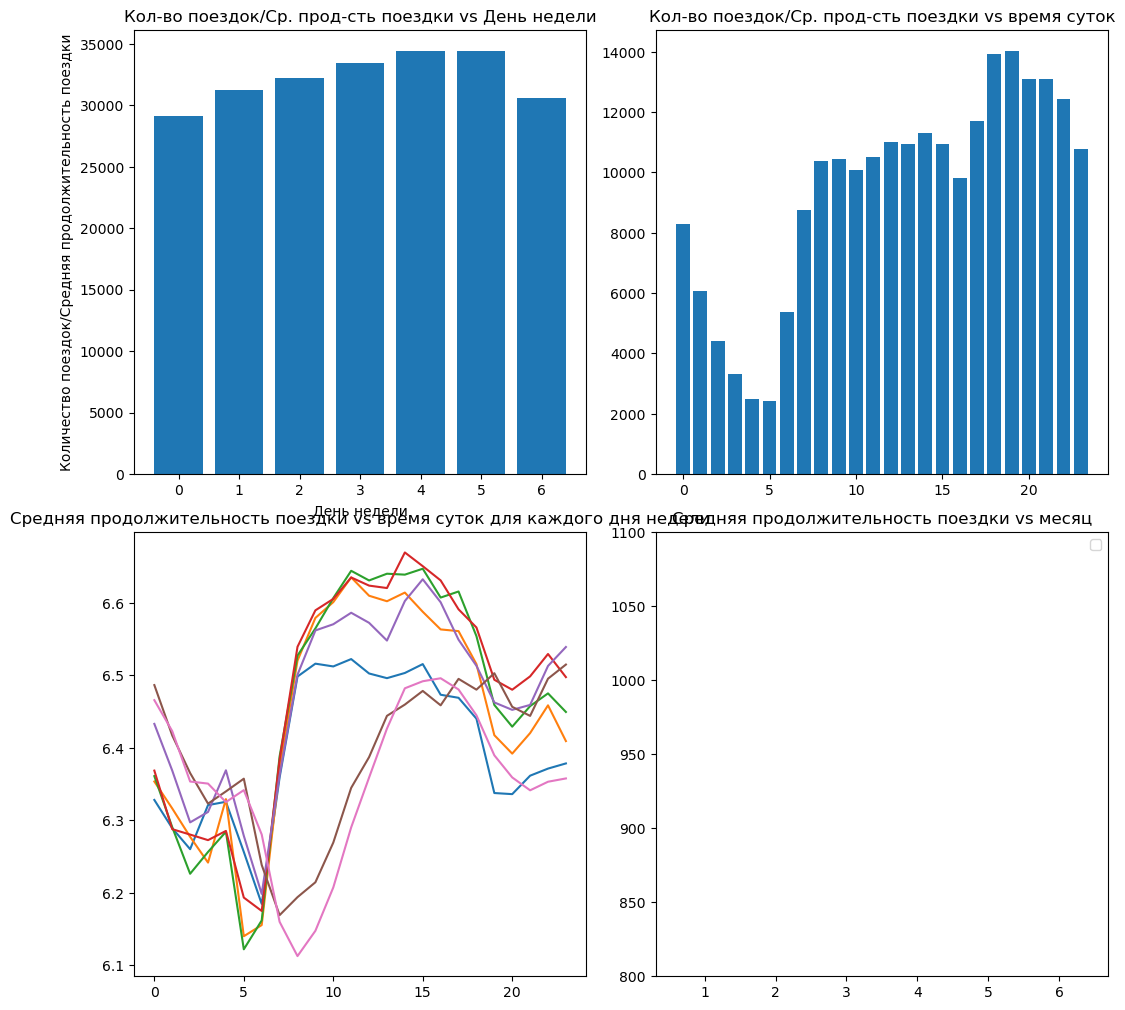

In [10]:
fig = plt.figure() # создаем полотно 

fig.set_size_inches(16, 10) # установка размера полотна 
ax_1 = fig.add_subplot(2, 3, 1) # Количество поездок/Средняя продолжительность поездки vs День недели
plt.bar(sorted(list(processed_data['day_of_week'].unique())), processed_data.groupby('day_of_week')['day_of_week'].count()/processed_data.groupby('day_of_week')['log_trip_duration'].mean())
plt.xlabel('День недели')
plt.ylabel('Количество поездок/Средняя продолжительность поездки')

ax_2 = fig.add_subplot(2, 3, 2) # Количество поездок/Средняя продолжительность поездки vs время суток
plt.bar(sorted(list(processed_data['hour'].unique())), processed_data.groupby('hour')['hour'].count()/processed_data.groupby('hour')['log_trip_duration'].mean())

ax_3 = fig.add_subplot(2,3, 4)
for i in range(len(list(processed_data['day_of_week'].unique()))):
    plt.plot(processed_data[processed_data['day_of_week'] == i].groupby('hour')['log_trip_duration'].mean(), label = i )

ax_4 = fig.add_subplot(2, 3, 5) # Количество поездок/Средняя продолжительность поездки vs День недели
plt.bar(sorted(list(processed_data['month'].unique())), processed_data.groupby('month')['log_trip_duration'].mean())
plt.ylim((800, 1100))# устанавливает пределны оси y 
    

fig.tight_layout()
ax_1.set(title = 'Кол-во поездок/Ср. прод-сть поездки vs День недели') # названаие 1 гистрограммы 
ax_2.set(title = 'Кол-во поездок/Ср. прод-сть поездки vs время суток') # названаие 2 гистрограммы 
ax_3.set(title = 'Средняя продолжительность поездки vs время суток для каждого дня недели') # названаие 3 графика 
ax_4.set(title = 'Средняя продолжительность поездки vs месяц') # названаие 3 графика 
plt.legend() 
plt.show()

Кажется, что полученные выводы из графиков выше достаточны для того, чтобы посчитать признаки, связанные с временем/датой поездки, достаточно важными. На их основе выделим еще пару.

Добавьте следующие бинарные признаки:


1. Была ли в день поездки буря (основываясь на единственном обнаруженном таком дне)
2. Является ли время поездки статистически самым проблемным, то есть час пиком?

Для создания 2ой фичи используйте следующую логику: посчитаем для каждой пары "день недели"-"время суток" среднее значение таргета. Найдем топ-10 самых "больших" пар. Если поездка была совершена во входящее в этот топ время, то ставим 1. Иначе - 0. Получается бинарный признак.

P.S. назовите колонки **anomaly** и **traffic_jam**

In [23]:
### Создадим первый бинарный признак
### Your code is here
a = processed_data.date.value_counts().idxmin()
processed_data['anomaly'] = processed_data.date.apply(lambda x: 1 if x == a else 0)
processed_data[processed_data['anomaly'] == 1]

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime,date,day_of_week,hour,month,anomaly
id,,,,,,,,,,,
id1027675,1,930.399753,0,1.001201,7.088409,2016-01-23 08:46:42,2016-01-23,5,8,1,1
id2657420,0,930.399753,0,7.044418,7.163172,2016-01-23 00:06:25,2016-01-23,5,0,1,1
id3382236,1,1070.232174,0,1.268585,5.808142,2016-01-23 10:38:43,2016-01-23,5,10,1,1
id2636301,1,930.399753,0,3.689727,6.885510,2016-01-23 01:16:58,2016-01-23,5,1,1,1
id0252677,1,1070.232174,0,3.358010,6.889591,2016-01-23 00:19:01,2016-01-23,5,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
id2645547,1,930.399753,0,1.001283,5.552960,2016-01-23 11:36:46,2016-01-23,5,11,1,1
id1907515,1,1028.236276,0,0.000000,6.133398,2016-01-23 01:08:39,2016-01-23,5,1,1,1
id1950275,0,1005.458335,0,4.712631,6.927558,2016-01-23 03:14:57,2016-01-23,5,3,1,1


In [183]:
(processed_data['month'].unique())

array([3, 6, 1, 4, 5, 2], dtype=int64)

In [26]:
### Создадим второй бинарный признак
### Your code is here
top_10_days = processed_data.groupby(['day_of_week', 'hour'], as_index=False). \
                             log_trip_duration.mean(). \
                             sort_values('log_trip_duration', ascending=False). \
                             rename({'log_trip_duration': 'top_log_trip_duration'}, axis=1). \
                             head(10)
top_10_days

,day_of_week,hour,top_log_trip_duration
86,3,14,6.669526
87,3,15,6.650622
63,2,15,6.647091
59,2,11,6.644226
61,2,13,6.640205
62,2,14,6.638930
35,1,11,6.635141
83,3,11,6.635055
111,4,15,6.632537
88,3,16,6.630965


In [30]:
processed_data = processed_data.merge(top_10_days, how='left', on=['day_of_week', 'hour']) # слияние таблиц по 'day_of_week', 'hour'
processed_data['traffic_jam'] = processed_data.top_log_trip_duration.apply(lambda x: 0 if x != x else 1)
processed_data.head(4)

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime,date,day_of_week,hour,month,anomaly,top_log_trip_duration,traffic_jam
0,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55,2016-03-14,0,17,3,0,NaN,0
1,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35,2016-06-12,6,0,6,0,NaN,0
2,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24,2016-01-19,1,11,1,0,6.635141,1
3,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31,2016-04-06,2,19,4,0,NaN,0


In [31]:
processed_data = processed_data.drop('top_log_trip_duration', axis=1)

In [32]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime,date,day_of_week,hour,month,anomaly,traffic_jam
0,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55,2016-03-14,0,17,3,0,0
1,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35,2016-06-12,6,0,6,0,0
2,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24,2016-01-19,1,11,1,0,1
3,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31,2016-04-06,2,19,4,0,0
4,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55,2016-03-26,5,13,3,0,0


Теперь колонки **pickup_datetime**, **date** можно убрать. А про оставшиеся **day_of_week**, **hour**, **month** необходимо подумать:

- С одной стороны, первые две можно убрать, так как на их основе была создана колонка **traffic_jam**
- С другой стороны, зависимость с колонкой **traffic_jam** нелинейная, поэтому можно попробовать использовать все фичи в комбинации. Конечно, лучше попробовать оба варианта и проэкспериментировать, но ради упрощения - оставим все колонки. Хоть **day_of_week**, **hour** и описываются числами, мы понимаем, что это скорее категориальные фичи. Потому что, например, отношение между 23:00 и 00:00 не такое же, как между числами 23 и 0. Закодируем их с помощью OneHotEncoder. 
- Последняя (**month**) очевидно категориальная. Можно закодировать ее тоже через OneHotEncoder.

In [219]:
processed_data1 = processed_data

In [222]:
processed_data1 =pd.get_dummies(processed_data1, columns = ['day_of_week', 'hour', 'month'],dtype='int')


KeyError: "None of [Index(['day_of_week', 'hour', 'month'], dtype='object')] are in the [columns]"

In [233]:
processed_data1 


,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,anomaly,traffic_jam,day_of_week_1,day_of_week_2,day_of_week_3,...,hour_19,hour_20,hour_21,hour_22,hour_23,month_2,month_3,month_4,month_5,month_6
0,1,930.399753,0,1.500479,6.122493,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,930.399753,0,1.807119,6.498282,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,930.399753,0,6.392080,7.661527,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,930.399753,0,1.487155,6.063785,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,1,930.399753,0,1.189925,6.077642,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,1,1053.529749,0,1.226296,6.658011,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1458640,0,930.399753,0,6.056935,6.486161,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1458641,1,930.399753,0,7.832952,6.639876,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1458642,0,930.399753,0,1.093786,5.924256,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [234]:
### Делаем OneHotEncoding и конкатим с processed_data
from sklearn. preprocessing import OneHotEncoder

for col in ['day_of_week', 'hour', 'month']:


IndentationError: expected an indented block (3978890502.py, line 4)

In [229]:
processed_data1 = processed_data1.drop(['day_of_week_0', 'hour_0', 'month_1'], axis=1)

In [235]:
processed_data1.dtypes


vendor_id               int64
passenger_count       float64
store_and_fwd_flag      int64
distance_km           float64
log_trip_duration     float64
anomaly                 int64
traffic_jam             int64
day_of_week_1           int32
day_of_week_2           int32
day_of_week_3           int32
day_of_week_4           int32
day_of_week_5           int32
day_of_week_6           int32
hour_1                  int32
hour_2                  int32
hour_3                  int32
hour_4                  int32
hour_5                  int32
hour_6                  int32
hour_7                  int32
hour_8                  int32
hour_9                  int32
hour_10                 int32
hour_11                 int32
hour_12                 int32
hour_13                 int32
hour_14                 int32
hour_15                 int32
hour_16                 int32
hour_17                 int32
hour_18                 int32
hour_19                 int32
hour_20                 int32
hour_21   

In [ ]:
### Your code is here
processed_data1.head(5).to_csv('1fin_df_HW_7.csv', sep=',')

Что же, мы с Вами научились с помощью EDA визуализаций понимать важность признаков не только постфактум, но и до того, как сформировался финальный датасет - на этапе **выделения базовых фичей**.

Обратимся теперь к методам фильтрации - например, применим корреляционный анализ для одной пары фичей, чтобы понять, нет ли относительно этих колонок в нашем датасете избытка информации. 

Вспомним так же изначальные вещественные признаки - distance_km, passenger_count

Посчитайте корреляцию между ними. Есть ли какие-то основания для беспокойства?

In [ ]:
processed_data.head()

In [3]:
### На данный момент у нас 41 фича
### Представим, что хочется сократить их количество до 5.
### Воспользуемся для этим каким-нибудь методом обертки
### Например, метод прямого отбора

### Your code is here


In [4]:
### Перечислите фичи, которые окажутся наиболее желанными
### Your code is here


In [5]:
### Представим, что мы с Вами ничего не знаем про Кросс-Валидацию и отложенную выборку
### Замерьте качество линейной регрессии на данных фичах
### Сильно ли оно отличается от полученного на Кросс-Валидации в прошлом уроке в ДЗ?

### Your code is here

